<a href="https://colab.research.google.com/github/rahayumaharani/Rahayu-Rosalia-Mid/blob/main/Insight_3_Room_3_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bakery Market Basket Analysis**

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('BreadBasket_DMS.csv')
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [3]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [22]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(20))

First Ten Rows of the DataFrame: 

          Date      Time  Transaction           Item  Year Month Day
0   2016-10-30  09:58:11            1          Bread  2016    10  30
1   2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2   2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3   2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4   2016-10-30  10:07:57            3            Jam  2016    10  30
5   2016-10-30  10:07:57            3        Cookies  2016    10  30
6   2016-10-30  10:08:41            4         Muffin  2016    10  30
7   2016-10-30  10:13:03            5         Coffee  2016    10  30
8   2016-10-30  10:13:03            5         Pastry  2016    10  30
9   2016-10-30  10:13:03            5          Bread  2016    10  30
10  2016-10-30  10:16:55            6      Medialuna  2016    10  30
11  2016-10-30  10:16:55            6         Pastry  2016    10  30
12  2016-10-30  10:16:55            6         Muffin  2016    10  30

In [23]:
print('Unique Items: ', df['Item'].nunique())

Unique Items:  94


In [74]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
Year           0
Month          0
Day            0
dtype: int64


In [26]:
# cek nilai "NONE" pada kolom Item
print(df[df['Item']=='NONE'])

Empty DataFrame
Columns: [Date, Time, Transaction, Item, Year, Month, Day]
Index: []


In [27]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [28]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB
None


In [29]:
# Year (ingat kembali penulisan function lambda)
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

In [30]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


In [46]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(10)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: Item, dtype: int64


In [47]:
#Menampilkan data Transaksi
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 50 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,13.339348
Bread,8.106988
Tea,3.498805
Cake,2.499147
Pastry,2.087092


Text(0.5, 1.0, 'Items Most Sold')

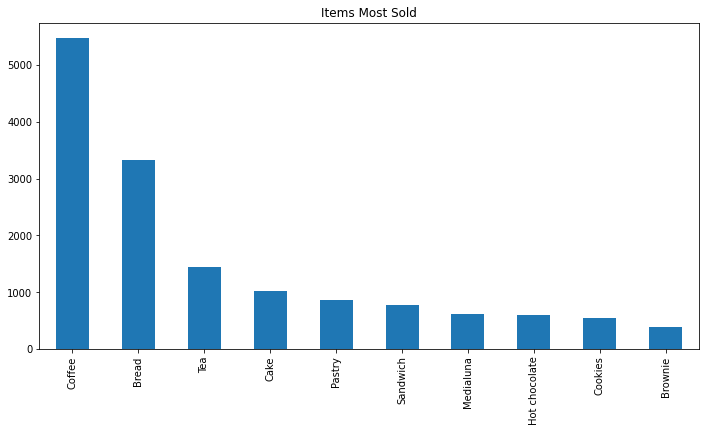

In [49]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(26,6))

plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

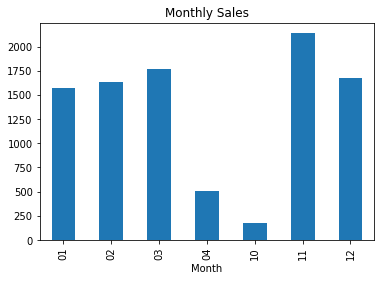

In [50]:
df.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [51]:
print(df.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


**Market Data Analisis**

In [52]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [76]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [77]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [78]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
13,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
14,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
0,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
1,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
3,(Tea),(Cake),0.023772,0.166667,1.604781
2,(Cake),(Tea),0.023772,0.228891,1.604781
6,(Toast),(Coffee),0.023666,0.704403,1.472431
7,(Coffee),(Toast),0.023666,0.049470,1.472431
10,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872
11,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872


In [72]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
15,(Toast),(Coffee),0.023666,0.704403,1.472431
13,(Spanish Brunch),(Coffee),0.010882,0.598837,1.251766
7,(Medialuna),(Coffee),0.035182,0.569231,1.189878
9,(Pastry),(Coffee),0.047544,0.552147,1.154168
0,(Alfajores),(Coffee),0.019651,0.540698,1.130235
6,(Juice),(Coffee),0.020602,0.534247,1.116750
10,(Sandwich),(Coffee),0.038246,0.532353,1.112792
3,(Cake),(Coffee),0.054728,0.526958,1.101515
11,(Scone),(Coffee),0.018067,0.522936,1.093107
4,(Cookies),(Coffee),0.028209,0.518447,1.083723


# **Kesimpulan**

-Menggunakan 20 data yang akan di pakai
-Menggunakan 10 data item penjualan terbanyak
-Modifikasi pada return menjadi 50
-Visualisasi data menggunakan barchart dengan 10 data dan perubahan size 
-Modifikasi metric(lift) min-support=0.01 & min-threshold=1.2 sehingga menghasilkan 15 data transaksi
-Modifikasi metric(confidence) min-support=0.01 & min-threshold=0.3 sehingga menghasilkan 18 data transaksi

Kesimpulan :
Orang yang membeli cake dan coffee sebesar 5% dari total transaksi data. 
Sehingga orang yang membeli cake sudah pasti membeli coffee sebesar 52%
sedangakan orang yang membeli coffee belum tentu membeli cake.